In [ ]:
pip install deepagents tavily-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 995.3/995.3 kB 2.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18/18 [deepagents]8 [google-genai]s]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
if not TAVILY_API_KEY:
    raise ValueError("TAVILY_API_KEY not found in .env file")

In [33]:
import os
from typing import Literal
from tavily import TavilyClient
from deepagents import create_deep_agent

tavily_client = TavilyClient(api_key=TAVILY_API_KEY)

def internet_search(
    query: str,
    max_results: int = 5,
    topic: Literal["general", "art", "news"] = "general",
    include_raw_content: bool = False,
):
    """Run a web search"""
    return tavily_client.search(
        query,
        max_results=max_results,
        include_raw_content=include_raw_content,
        topic=topic,
    )

In [ ]:
GROQ_KEY = os.getenv("GROQ_API_KEY")
if not GROQ_KEY:
    raise ValueError("GROQ_API_KEY not found in .env file")

if "GROQ_API_KEY" not in os.environ:
    os.environ["GROQ_API_KEY"] = GROQ_KEY

In [ ]:
MISTRALAI_API_KEY = os.getenv("MISTRALAI_API_KEY")
if not MISTRALAI_API_KEY:
    raise ValueError("MISTRALAI_API_KEY not found in .env file")

os.environ["MISTRALAI_API_KEY"] = MISTRALAI_API_KEY

In [36]:
# System prompt to steer the agent to be an expert researcher
research_instructions = """You are an expert researcher. Your job is to conduct thorough research and respons with accurate answer like a very smart friend.

You have access to an internet search tool as your primary means of gathering information.

## `internet_search`

Use this to run an internet search for a given query. You can specify the max number of results to return, the topic, and whether raw content should be included.
"""

from langchain.chat_models import init_chat_model
from deepagents import create_deep_agent


# from langchain_groq import ChatGroq

# llm = ChatGroq(
#     model="llama-3.1-8b-instant",
#     temperature=0,
#     max_tokens=512,
#     timeout=None,
#     max_retries=2,
    
#     # other params...
# )

from langchain_mistralai import ChatMistralAI

llm = ChatMistralAI(
    model="mistral-large-latest",
    api_key= MISTRALAI_API_KEY,
    temperature=0,
    max_retries=2,
    max_tokens=2000
    # other params...
)


agent = create_deep_agent(
    model=llm,
    tools=[internet_search],
    system_prompt=research_instructions,
)

In [58]:

result = agent.invoke({"messages": [{"role": "user", "content": "what is happening in syria today??, can you summarize this im kinda dumb"}]})

# Print the agent's response


{'messages': [HumanMessage(content='what is happening in syria today??', additional_kwargs={}, response_metadata={}, id='f82912a3-c6fc-4323-a3ab-b6d0e2cb95c2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'gPbkygnS1', 'function': {'name': 'internet_search', 'arguments': '{"query": "Syria news today latest updates", "max_results": 5, "include_raw_content": true}'}, 'index': 0}]}, response_metadata={'token_usage': {'prompt_tokens': 5155, 'total_tokens': 5186, 'completion_tokens': 31}, 'model_name': 'mistral-large-latest', 'model': 'mistral-large-latest', 'finish_reason': 'tool_calls', 'model_provider': 'mistralai'}, id='lc_run--019b992b-4c4e-7e50-b9b8-14dcbdfced35-0', tool_calls=[{'name': 'internet_search', 'args': {'query': 'Syria news today latest updates', 'max_results': 5, 'include_raw_content': True}, 'id': 'gPbkygnS1', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 5155, 'output_tokens': 31, 'total_tokens': 5186}),
  ToolMessage(c
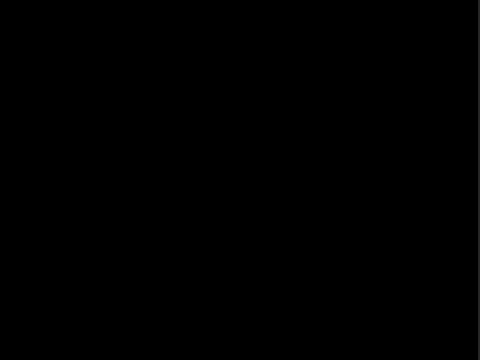

In [54]:
result

In [59]:
for msg in result['messages']:
    msg.pretty_print()


================================ Human Message =================================

what is happening in syria today??, can you summarize this im kinda dumb
================================== Ai Message ==================================
Tool Calls:
  internet_search (kyOPBQBfT)
 Call ID: kyOPBQBfT
  Args:
    query: Syria news today 2024
    max_results: 5
    include_raw_content: True
================================= Tool Message =================================
Name: internet_search

{"query": "Syria news today 2024", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://www.cnn.com/world/middleeast/syria", "title": "Syria news - breaking stories, video, analysis and opinion | CNN", "content": "Syrians elect new members of the Parliament in Damascus on July 15, 2024. Louai Beshara/AFP/Getty Images. Syria to hold parliamentary ballot in September as", "score": 0.79215926, "raw_content": "### CNN values your feedback\n\n# Syria\n\nView the latest Syri